[34.11698533 29.10596481 19.88277883 15.79333232  9.7663598   6.83313945
  6.0481928   2.69314614  3.27263516  3.12238921  1.65999658  5.53732955
  6.70969053 11.10336772 16.09643204 22.99242013 29.6670127  37.16615128
 43.61938527 53.2727749 ]


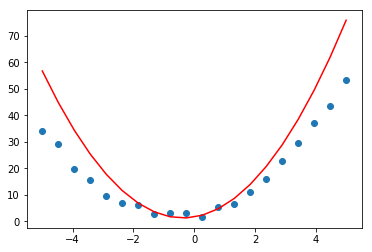

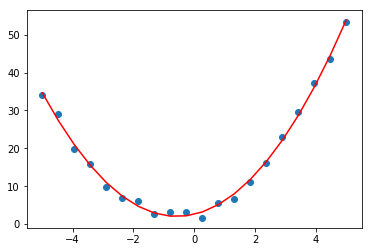

In [12]:
import numpy as np
from numpy import array
from numpy import matmul
from numpy.linalg import inv
from numpy.random import rand
from matplotlib import pyplot

# generate data on a line perturbed with some noise
noise_margin= 3
w = 2*rand(3,1) # w[0] is random constant term (offset from origin), w[1] is random linear term, w[2] is random quadratic term
x  = np.linspace(-5,5,20)
y = w[0] + w[1]*x + w[2]*x**2 + noise_margin*rand(len(x))

# create the design matrix: the x data, and add a column of ones for the constant term
X = np.column_stack( [np.ones([len(x), 1]), x.reshape(-1, 1), (x**2).reshape(-1, 1)] )

# These are the normal equations in matrix form: w = (X' X)^-1 X' y
w_est = matmul(inv(matmul(X.transpose(),X)),X.transpose()).dot(y)

# evaluate the x values in the fitted model to get estimated y values
y_est = w_est[0] + w_est[1]*x + w_est[2]*x**2

# visualize the fitted model
pyplot.scatter(x, y)
pyplot.plot(x, y_est, color='red')
pyplot.show()